# NeuroMet

Instructions:
* this notebook cannot be used for two different analysis at the same time. If you are unsure if someone is using it click on File / Make a copy and work with the copy.
* to run a cell press Umschalt (Shift) + Enter
* to correctly run the workflow _EVERY_ cell has to be ran
* When you run a cell, there is at first an [*] on the left, then a number (maybe an updated number) when the cell ran..6 
* normally the only thing to adjust in the settings is the subject_list

### External Modules

In [1]:
import sys, os, glob 
sys.path.append(os.path.abspath('../'))
from neuromet.NeuroMet2_dev_fs7 import NeuroMet
from neuromet import scanner_to_bids

In [2]:
from IPython.display import Image
%matplotlib inline

### Settings

In [3]:
## Paths
raw_data_dir = '/media/drive_s/AG/AG-Floeel-Imaging/00-Rohdaten/02_niftis/NeuroMET2_LauraGöschel/2_Messkohorte' # Directory with files with scanner structure
base_dir = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET_BIDS/NeuroMET_dev'
temp_dir = '/home/WorkFlowTemp/NeuroMet_BIDS'

#cores
cores = 4
omp_nthreads = 2

In [4]:
# Subject list as $ID$session. i.e. for sub-001/ses-01 '0001T01'
subject_list = ['2008T3']

### Copy from raw data

In [5]:
import importlib
importlib.reload(scanner_to_bids)

<module 'neuromet.scanner_to_bids' from '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET_BIDS/NeuroMET/code/NeuroMET/neuromet/scanner_to_bids.py'>

In [6]:
s2b = scanner_to_bids.ScannerToBIDS(sublist = subject_list,
                   raw_data_dir = raw_data_dir,
                   temp_dir = temp_dir,
                   bids_root=base_dir)

In [7]:
s2bwf = s2b.make_workflow()

In [8]:
s2bwf.run()

210422-15:16:10,19 nipype.workflow INFO:
	 Workflow scanner_to_bids settings: ['check', 'execution', 'logging', 'monitoring']
210422-15:16:10,26 nipype.workflow INFO:
	 Running serially.
210422-15:16:10,27 nipype.workflow INFO:
	 [Node] Setting-up "scanner_to_bids.parse_scanner_dir" in "/home/WorkFlowTemp/NeuroMet_BIDS/scanner_to_bids/_subject_str_2008T3/parse_scanner_dir".
210422-15:16:10,38 nipype.workflow INFO:
	 [Node] Running "parse_scanner_dir" ("neuromet.nodes.parse_scanner_dir.ParseScannerDir")
210422-15:16:10,252 nipype.workflow INFO:
	 [Node] Finished "scanner_to_bids.parse_scanner_dir".
210422-15:16:10,253 nipype.workflow INFO:
	 [Node] Setting-up "scanner_to_bids.mv_phasediff" in "/home/WorkFlowTemp/NeuroMet_BIDS/scanner_to_bids/_subject_str_2008T3/mv_phasediff".
210422-15:16:10,328 nipype.workflow INFO:
	 [Node] Running "mv_phasediff" ("nipype.interfaces.utility.base.Rename")
210422-15:16:10,358 nipype.workflow INFO:
	 [Node] Finished "scanner_to_bids.mv_phasediff".
210422

RuntimeError: Workflow did not execute cleanly. Check log for details

In [ ]:
# SPM Segment and Mask generation

### Tissue Segmentation Pipeline

In [9]:
neuromet = NeuroMet(sublist = subject_list,
                    raw_data_dir = raw_data_dir,
                    temp_dir = temp_dir,
                    bids_root = base_dir,
                    omp_nthreads = omp_nthreads)

In [10]:
neuromet = neuromet.make_tissue_segmentation_wf()

210422-15:16:23,489 nipype.workflow INFO:
	 Generated workflow graph: ./imgs/tissue_segmentation_wf.png (graph2use=colored, simple_form=True).


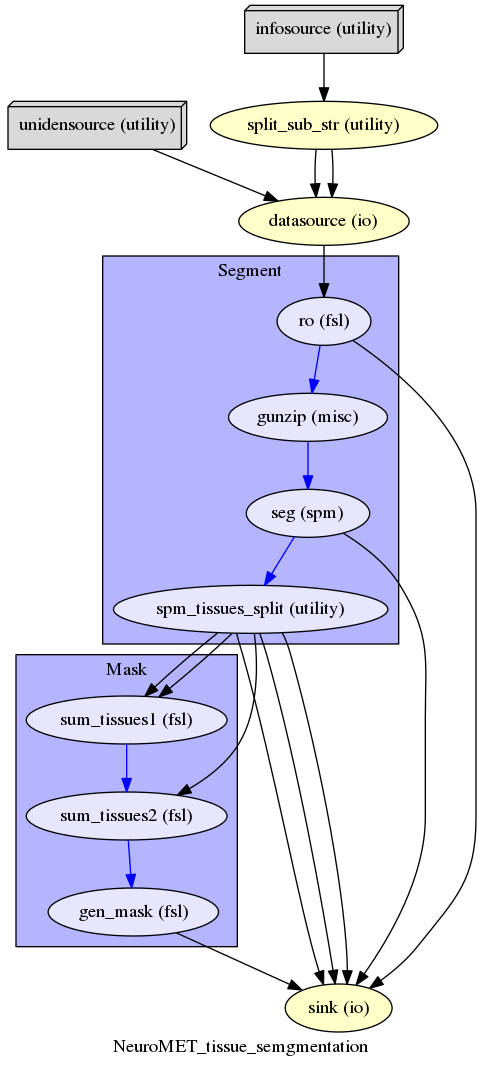

In [11]:
neuromet.write_graph(graph2use = 'colored', dotfilename = './imgs/tissue_segmentation_wf')
Image(filename='./imgs/tissue_segmentation_wf.png', width=250)

In [12]:
%%time
neuromet.run('MultiProc', plugin_args={'n_procs': cores})

210422-15:16:23,515 nipype.workflow INFO:
	 Workflow NeuroMET_tissue_semgmentation settings: ['check', 'execution', 'logging', 'monitoring']
210422-15:16:23,529 nipype.workflow INFO:
	 Running in parallel.
210422-15:16:23,531 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 28.15/28.15, Free processors: 4/4.
210422-15:16:23,579 nipype.workflow INFO:
	 [Job 0] Cached (NeuroMET_tissue_semgmentation.split_sub_str).
210422-15:16:25,536 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 28.15/28.15, Free processors: 4/4.
210422-15:16:25,660 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET_tissue_semgmentation.datasource" in "/home/WorkFlowTemp/NeuroMet_BIDS/NeuroMET_tissue_semgmentation/_subject_id_2008T3/_uniden_UNI/datasource".
210422-15:16:25,665 nipype.workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")
210422-15:16:25,652 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET_tis

In [18]:
print(subject_list)

['2008T3']


In [19]:
# Uncomment here for all subjects:
#subject_list = [ x.split('/')[-1][8:11] for x in uni ]

# only some subjects? Then edit here:  
#subject_list = ['2004']

In [20]:
import importlib, sys, os
sys.path.append(os.path.abspath('../'))
from neuromet.NeuroMet2_dev_fs7 import NeuroMet

In [21]:
neuromet_fs = NeuroMet(sublist = subject_list,
                    raw_data_dir = raw_data_dir,
                    temp_dir = temp_dir,
                    bids_root = base_dir,
                    omp_nthreads = omp_nthreads)
neuromet_fs = neuromet_fs.make_freesurfer_wf()

210422-15:16:58,711 nipype.workflow INFO:
	 Generated workflow graph: ./imgs/freesurfer_wf.png (graph2use=colored, simple_form=True).


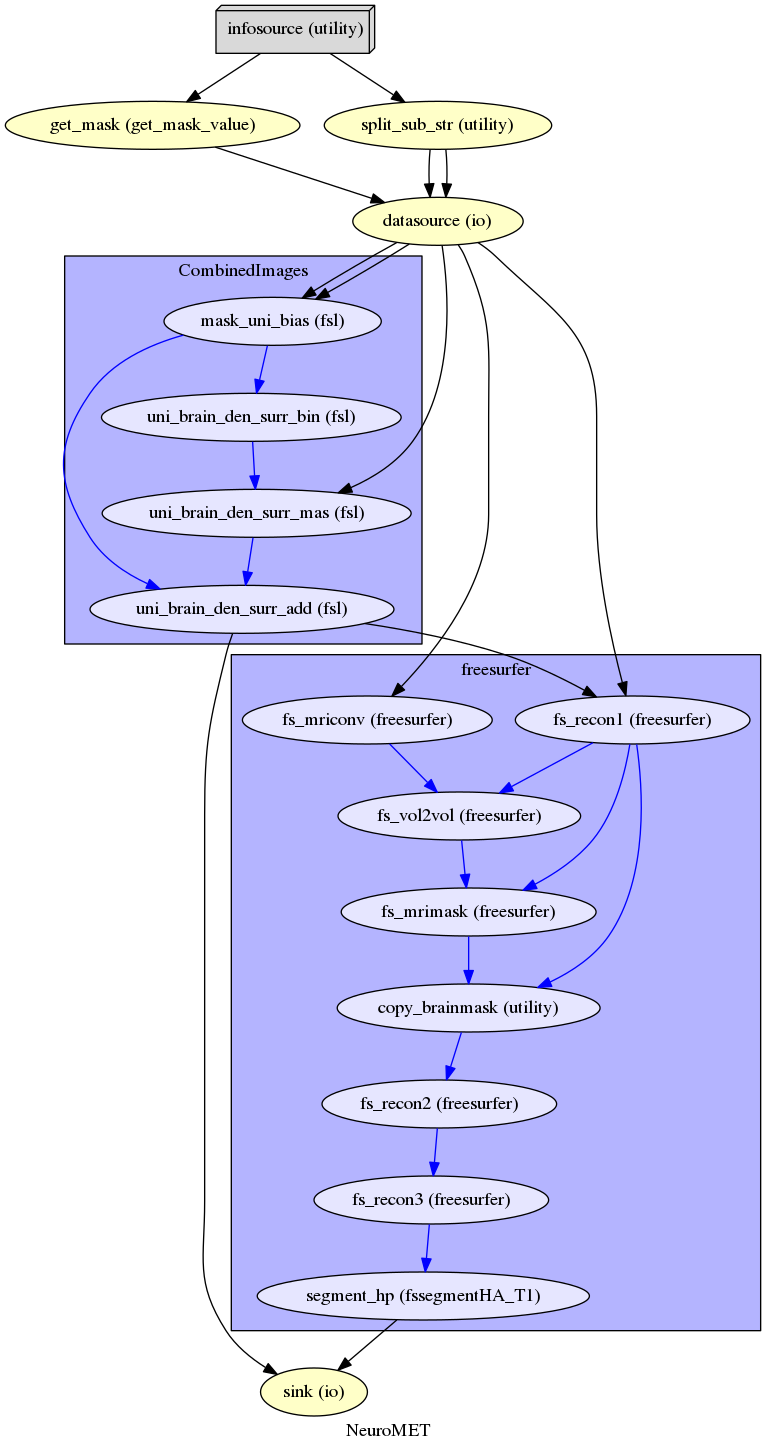

In [22]:
neuromet_fs.write_graph(graph2use = 'colored', dotfilename = './imgs/freesurfer_wf')
Image(filename='./imgs/freesurfer_wf.png', width=300)

### Run Freesurfer Analysis

In [ ]:
%%time
neuromet_fs.run('MultiProc', plugin_args={'n_procs': cores})

210422-15:17:00,348 nipype.workflow INFO:
	 Workflow NeuroMET settings: ['check', 'execution', 'logging', 'monitoring']
210422-15:17:00,358 nipype.workflow INFO:
	 Running in parallel.
210422-15:17:00,360 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 28.15/28.15, Free processors: 4/4.
210422-15:17:00,415 nipype.workflow INFO:
	 [Job 0] Cached (NeuroMET.get_mask).
210422-15:17:00,417 nipype.workflow INFO:
	 [Job 1] Cached (NeuroMET.split_sub_str).
210422-15:17:02,365 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 28.15/28.15, Free processors: 4/4.
210422-15:17:02,451 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.datasource" in "/home/WorkFlowTemp/NeuroMet_BIDS/NeuroMET/_subject_id_2008T3/datasource".
210422-15:17:02,485 nipype.workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")
210422-15:17:02,528 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.datasource".
210422-1

In [ ]:
help(ra)

In [ ]:
# Calculate and Ajust Volumes

In [ ]:
from pipeline.nodes import adj_vol, qdec

In [ ]:
import importlib
importlib.reload(qdec)

In [ ]:
q = qdec.QDec()

In [ ]:
q.inputs.basedir = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7'

In [ ]:
q.run().outputs.stats_directory

In [ ]:
import importlib
importlib.reload(adj_vol)

In [ ]:
v = adj_vol.AdjustVolume()

In [ ]:
v.inputs.stats_directory = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/stats_tables'
v.inputs.diag_csv = 